In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# Configuration
import os
import sys
rootpath = os.path.dirname(os.getcwd())
sys.path.append(rootpath)

from news import NewsCorpus, NewsIO, NewsPath
newsio = NewsIO()
newspath = NewsPath()

import json
import itertools
import numpy as np
from tqdm import tqdm
from collections import defaultdict, Counter

In [2]:
## Filenames
fname_text_feature_first = 'text_feature_first.json'
fname_text_feature_second = 'text_feature_second.json'
fname_text_feature_topic_first = 'text_feature_topic_first.json'
fname_text_feature_topic_second = 'text_feature_topic_second.json'

fname_tfidf = 'tfidf.pk'
fname_word_counter = 'word_counter.pk'
fname_doc_counter = 'doc_counter.pk'

## Parameters
DO_WORD = False
DO_TOPIC = False
DO_BUILD_TFIDF = False

/data/blank54/anaconda3/envs/news/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
corpus = NewsCorpus(dname_corpus='corpus_topic_filtered',
                        start='200501',
                        end='201912')


/data/blank54/anaconda3/envs/news/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
print('============================================================')
print('Text feature engineering')

if DO_WORD:
    text_feature_first, text_feature_second = build_text_feature(corpus)
    newsio.save_json(_object=text_feature_first, _type='data', fname_object=fname_text_feature_first, verbose=False)
    newsio.save_json(_object=text_feature_second, _type='data', fname_object=fname_text_feature_second, verbose=False)
else:
    text_feature_first = newsio.load_json(fname_object=fname_text_feature_first, _type='data')
    text_feature_second = newsio.load_json(fname_object=fname_text_feature_second, _type='data')


if DO_TOPIC:
    text_feature_topic_first, text_feature_topic_second = build_text_feature_topic(corpus)
    newsio.save_json(_object=text_feature_topic_first, _type='data', fname_object=fname_text_feature_topic_first, verbose=False)
    newsio.save_json(_object=text_feature_topic_second, _type='data', fname_object=fname_text_feature_topic_second, verbose=False)
else:
    text_feature_topic_first = newsio.load_json(fname_object=fname_text_feature_topic_first, _type='data')
    text_feature_topic_second = newsio.load_json(fname_object=fname_text_feature_topic_second, _type='data')

print('  | Evaluation of text features')
word_set = []
for yearmonth in tqdm(corpus.yearmonth_list):
    word_set.extend(text_feature_first[yearmonth]['word_count'].values())
print('  | # of individual words (Feature engineering): {:,}'.format(len(word_set)))

/data/blank54/anaconda3/envs/news/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text feature engineering
  | fdir : /data/blank54/workspace/project/news/data
  | fname: text_feature_first.json


100%|██████████| 180/180 [00:00<00:00, 2072.53it/s]

  | fdir : /data/blank54/workspace/project/news/data
  | fname: text_feature_second.json
  | fdir : /data/blank54/workspace/project/news/data
  | fname: text_feature_topic_first.json
  | fdir : /data/blank54/workspace/project/news/data
  | fname: text_feature_topic_second.json
  | Evaluation of text features
  | # of individual words (Feature engineering): 6,333,433


In [6]:
print('============================================================')
print('Build TF-IDF')

if DO_BUILD_TFIDF:
    word_counter, tfidf = build_tfidf(corpus=corpus)
    newsio.save(_object=word_counter, _type='model', fname_object=fname_word_counter, verbose=False)
    newsio.save(_object=doc_counter, _type='model', fname_object=fname_doc_counter, verbose=False)
    newsio.save(_object=tfidf, _type='model', fname_object=fname_tfidf, verbose=False)
else:
    word_counter = newsio.load(fname_object=fname_word_counter, _type='model')
    doc_counter = newsio.load(fname_object=fname_doc_counter, _type='model')
    tfidf = newsio.load(fname_object=fname_tfidf, _type='model')

print('  | # of individual words (TF-IDF): {:,}'.format(len(word_counter)))

Build TF-IDF
  | fdir : /data/blank54/workspace/project/news/model
  | fname: word_counter.pk
  | fdir : /data/blank54/workspace/project/news/model
  | fname: doc_counter.pk
  | fdir : /data/blank54/workspace/project/news/model
  | fname: tfidf.pk
  | # of individual words (TF-IDF): 146,048


/data/blank54/anaconda3/envs/news/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
word_sorted = list(sorted([(word, tfidf[word]['tfidf']) for word in tfidf], key=lambda x:x[1], reverse=True))

/data/blank54/anaconda3/envs/news/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/data/blank54/anaconda3/envs/news/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


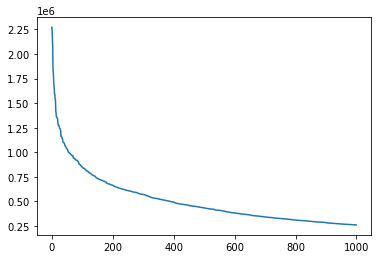

In [30]:
from matplotlib import pyplot as plt

y_values = [value for word, value in word_sorted[:1000]]

plt.plot(y_values)
plt.show()

/data/blank54/anaconda3/envs/news/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


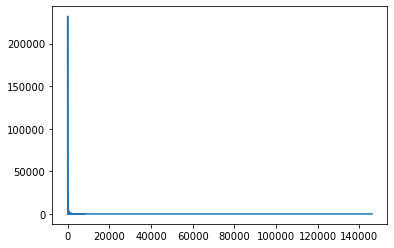

In [23]:
y_diff_values = []
for i in range(1, len(y_values)):
    y_diff_values.append((y_values[i-1] - y_values[i]))
    
plt.plot(y_diff_values)
plt.show()

/data/blank54/anaconda3/envs/news/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


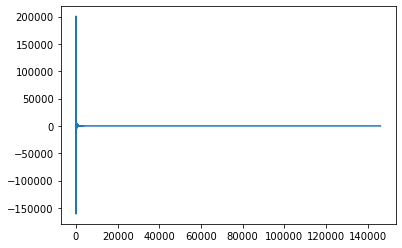

In [27]:
y_diff_diff_values = []
for i in range(1, len(y_diff_values)):
    y_diff_diff_values.append((y_diff_values[i-1] - y_diff_values[i]))
    
plt.plot(y_diff_diff_values)
plt.show()

In [29]:
for idx, value in enumerate(sorted(y_diff_values, reverse=True)[:100]):
    print(f'{idx}: {value}')

0: 232079.05002494645
1: 114224.97017172235
2: 107302.27170947287
3: 80442.50980599457
4: 71087.96139203385
5: 61632.95132701867
6: 59986.9699096242
7: 55096.98216461367
8: 48932.218036382925
9: 41411.481631127186
10: 40383.863707933575
11: 31474.300836173585
12: 22109.160094342893
13: 21468.715080042137
14: 20821.432469676947
15: 20603.10282754549
16: 20334.801037000958
17: 20082.39865491353
18: 18791.588209118927
19: 17954.90820600977
20: 15685.599783116253
21: 15391.68502040254
22: 11354.61751466419
23: 10445.97087410069
24: 10334.808471013326
25: 10273.294098211685
26: 9965.827553018462
27: 9725.250518572051
28: 9265.913672103314
29: 9100.793779866537
30: 8970.711698237807
31: 8787.283454158925
32: 8622.62211053446
33: 8011.921569057857
34: 7993.945297660539
35: 7980.672595227254
36: 7947.211826076033
37: 7447.408690829179
38: 7299.501100401743
39: 7257.378423206275
40: 6653.315042856615
41: 6418.756382842315
42: 6342.101189601468
43: 6330.54054923635
44: 6103.311645798734
45: 5915

/data/blank54/anaconda3/envs/news/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
import numpy as np
np.argmax(y_diff_values)

/data/blank54/anaconda3/envs/news/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3